# 파이썬 (0530) 13주차

김보람  
2022-05-30

## 클래스 공부 6단계

`-` 상속

### 인사관리 예제

`-` 아래와 같은 클래스를 만들자. - 이름, 직급, 연봉에 대한 정보가
있다. - 연봉을 올려주는 메소드가 존재

In [20]:
class Employee:
    def __init__(self, name, position=None, pay=0):
        self.name = name
        self.position = position
        self.pay = pay
    def _repr_html_(self):
        html_str = """
        이름: {} <br/>
        직급: {} <br/>
        연봉: {} <br/>
        """.format(self.name, self.position, self.pay)
        return html_str
    def giveraise(self,pct):
        self.pay = self.pay * (1+pct)
        

`-` 확인

In [21]:
iu = Employee('iu', position='staff', pay=5000)
hynn = Employee('hynn', position='staff', pay=4000)
hd = Employee('hodonh', position='mgr', pay=8000)

In [22]:
iu

In [23]:
hynn

In [24]:
hd

In [25]:
iu.giveraise(0.1)

In [26]:
iu

In [27]:
hynn.giveraise(0.2)

In [28]:
hynn

`-` 회사의 모든 직원의 연봉을 10%씩 올려보자.

In [32]:
iu = Employee('iu', position='staff', pay=5000)
hynn = Employee('hynn', position='staff', pay=4000)
hd = Employee('hodonh', position='mgr', pay=8000)

In [33]:
for i in [iu, hynn, hd]:
    print(i.name)

iu
hynn
hodonh

In [34]:
for i in [iu, hynn, hd]:
    i.giveraise(0.1) # 일괄적으로 상승

In [35]:
iu

In [36]:
hynn

In [37]:
hd

`-` 매니저 직급은 일반직원들의 상승분에서 5%의 보너스가 추가되어
상승한다고 가정

`-` 모든회사 직원들의 연봉을 10% 상승

(구현1) if문을 통한

In [38]:
iu = Employee('iu', position='staff', pay=5000)
hynn = Employee('hynn', position='staff', pay=4000)
hd = Employee('hodonh', position='mgr', pay=8000)

In [39]:
for i in [iu,hynn,hd]:
    if i.position == 'mgr':
        i.giveraise(0.1 + 0.05)
    else:
        i.giveraise(0.1)

In [40]:
iu

In [41]:
hynn

In [42]:
hd

(구현2) 새로운 클래스를 만들자

In [43]:
class Manager:
    def __init__(self, name, position=None, pay=0):
        self.name = name
        self.position = position
        self.pay = pay
    def _repr_html_(self):
        html_str = """
        이름: {} <br/>
        직급: {} <br/>
        연봉: {} <br/>
        """.format(self.name, self.position, self.pay)
        return html_str
    def giveraise(self,pct):
        self.pay = self.pay * (1+pct+0.05)
        

In [45]:
iu = Employee('iu', position='staff', pay=5000)
hynn = Employee('hynn', position='staff', pay=4000)
hd = Manager('hodonh', position='mgr', pay=8000)

In [46]:
for i in [iu,hynn,hd]:
    i.giveraise(0.1)

In [47]:
iu

In [48]:
hynn

In [49]:
hd

`-` 구현3: 이미 만들어진 클래스에서

In [50]:
class Manager(Employee):
    # 나머지 기타 함수내용은 Emplyee 클래스와 같음걸 표현하려면 위 가로에 Employee를 작성한다.
    def giveraise(self,pct):
        self.pay = self.pay * (1+pct+0.05)
        

In [52]:
hd=Manager('hodong',pay=8000)
hd  # 명시하지 않았는데 상속됨

In [53]:
iu = Employee('iu', position='staff', pay=5000)
hynn = Employee('hynn', position='staff', pay=4000)
hd = Manager('hodonh', position='mgr', pay=8000)

In [54]:
for i in [iu,hynn,hd]:
    i.giveraise(0.1)

In [55]:
iu

In [56]:
hynn

In [57]:
hd

`-` 요약: 이미 만들어진 클래스에서 대부분의 기능은 그대로 쓰지만
일부기능만 변경 혹은 추가하고 싶다면 클래스를 상속하면 된다!

### 리스트의 상속

-   내가 만든 클래스를 계속 상속하는 경우

`-` list 와 비슷한데 멤버들의 빈도가 계산되는 메소드를 포함하는 새로운
나만의 list를 만들자

In [58]:
lst = ['a','b','a','c','b','a','d']
lst

`-` 아래와 같은 딕셔너리를 만들고 싶다.

In [60]:
freq = {'a':3, 'b':2, 'c':1, 'd':1}  # 갯수
freq

-   lst.frequency()를 입력하면 위의 기능이 수행되도록 변형된 list를 쓰고
    싶다.

`-` 구현

(시도1) 절반 성공

In [61]:
freq = {'a':0, 'b':0, 'c':0, 'd':0}   # 일단 다 0이라 생각하고 코드 짜기 
freq

In [63]:
for item in lst:
    print(item)

a
b
a
c
b
a
d

In [64]:
for item in lst:
    print(freq[item])

0
0
0
0
0
0
0

In [65]:
for item in lst:
    freq[item] = freq[item] + 1

In [66]:
freq

반쯤 성공.. 리스트가 a,b,c,d 라는걸 알고 있어야 함

(시도2) 실패

In [67]:
lst

In [68]:
freq = dict()
freq

In [69]:
for item in lst:
    freq[item] = freq[item] + 1

In [71]:
freq['a']  # 매칭되는게 없다!

에러이유? `freq['a']` 를 호출할 수 없다 -\> `freq.get('a',0)`을 이용

In [73]:
freq.get('a')   # 4주차 3월 23일 복습  get메소드를 사용하면 없어도 에러를 표시하지 않음

In [75]:
freq.get?

-   key에 대응하는 값이 있으면 그 값을 리턴하고 없으면 default를 리턴

In [78]:
freq.get('a',0)  # a값 없으면 0으로 리턴

(시도3)

In [79]:
lst

In [80]:
freq = dict()
freq

In [82]:
for item in lst:
    freq[item] = freq.get(item,0) + 1

In [83]:
freq

`-` 이것을 내가 정의하는 새로운 list의 메소드로 넣고 싶다.

In [89]:
class L(list):   # L 이라는 클래스에 list에 있는 모든걸 상속받겠다.
    pass

In [85]:
a=[1,2,3]
a

In [86]:
a?

In [91]:
class L(list):
    def frequency(self):
        freq = dict()
        for item in self:
            freq[item] = freq.get(item,0) + 1
        return freq

In [92]:
lst = L([1,1,1,2,2,3])

In [96]:
lst?  

In [95]:
 # 리스트 같아 보이지만 타입이 L! 내가 설정한 클래스

In [97]:
lst  #원래 list에 있는 repr 기능을 상속받아서 이루어지는 결과

In [98]:
_lst = L([4,5,6])
_lst + _lst   # L자로형끼리 덧셈

In [105]:
lst + [4,5,6]   # l자료형과  list 자료형의 덧셈도 가능

-   L자료형의 덧셈은 list의 덧셈과 완전히 같음

In [104]:
lst.append(10)
lst   # 요론 기본적인 리스트 기능도 가능

In [102]:
lst.frequency()  # 리스트에서 이것 기능만 추가된거랑 똑같고 나머지는 다 리스트랑 똑같다

## Appendix: 사용자 정의 자료형의 유용함

`-` 사용자정의 자료형이 어떤 경우에는 유용할 수 있다.

In [108]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 97.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.9 MB/s eta 0:00:00

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

`-` 예제1

In [110]:
year = ['2016', '2017', '2017', '2017', 2017, 2018, 2018, 2019, 2019]
value = np.random.randn(9)

In [111]:
df = pd.DataFrame({'year':year, 'value':value})
df

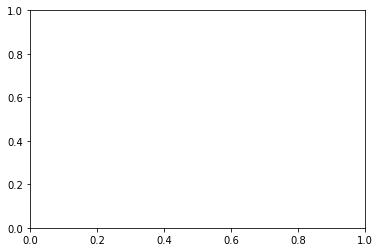

In [112]:
plt.plot(df.year, df.value)

In [114]:
df.year

-   dtype이 object 로 되어있어서 그림이 그려지지 않는다.. float로 되어야
    할텐데?

-   에러의 이유: df.year에 str, int가 동시에 있음

In [115]:
np.array(df.year)

-   자료형의 형태를 바꿔주면 해결할 수 있다.

In [116]:
np.array(df.year, dtype=np.float64)

In [117]:
np.array(df.year).astype(np.float64) # 위와 같은 효과

In [120]:
df.year.astype(np.float64)  # 위와 같은 효과

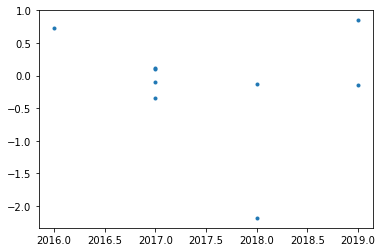

In [121]:
plt.plot(df.year.astype(np.float64), df.value,'.')

`-` 예제2

In [122]:
year = ['2016', '2017', '2017', '2017년', 2017, 2018, 2018, 2019, 2019]
value = np.random.randn(9)

In [123]:
df = pd.DataFrame({'year':year, 'value':value})
df

In [125]:
np.array(df.year, dtype=np.float64) # "년"이 써있어서 타입을 일괄적으로 바꾸기 어렵다.

In [127]:
df.year   # 어떤 값이 있는지 확인

In [131]:
np.unique(df.year)   # 섞여있는 타입에서는 unique는 동작하지 않는다.

In [132]:
L(df.year).frequency()

-   ’2016’과 같은 형태, ’2017년’과 같은 형태, 숫자형이 혼합 .. 이라는
    파악 가능 -\> 맞춤형 변환이 필요함

In [133]:
'2017년'.replace("년","")

In [142]:
def f(a):    # 데이터의 구조를 모르면 이런 함수를 짤 수가 없다. -> 자료의 구조를 확인해준다는 의미에서 freq가 있다면 편리하다.
    if type(a) is str:
        if "년" in a:
            return int(a.replace("년",""))
        else:
            return int(a)
    else:
        return a

In [143]:
[f(a) for a in df.year]

In [144]:
df.year = [f(a) for a in df.year]

In [139]:
df

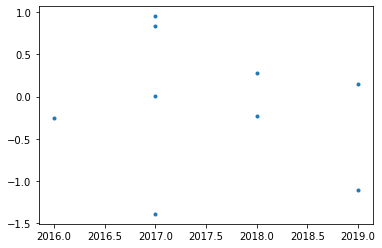

In [145]:
plt.plot(df.year, df.value, '.')